# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The TMDb movie dataset contains information of over 10,00 movies collected from a database known as **The Movie Database (TMDB)**. 

> The dataset contains 21 columns which are as follows; 
- id: number to identify the movie
- imdb_id: identification number of the movie on TMDb database
- popularity: ranking of how popular the movie is
- revenue: income generated from the movie
- budget: income or expenditure used in the production of the movie
- original_title: the title of the movie
- cast:the actors who played in the movie
- homepage: a webpage that leads you to the movie
- director: the directors of the movie
- tagline: a short text that gives insight into the movie
- keywords: words that describe objects or things that you will find in the movie.
- overview: a brief overview of what the movie is about
- runtime: the duration of the movie
- genres: describes the category of the movie
- production_companies: the companies that were in charge of production of the movies
- release_date: the date the movie was officially released to the public for viewing
- vote_count: how many votes the movie received
- vote_average: the average of the votes received by the movie
- release_year: the year in which the movie was released
- budget_adj: adjusted budget of the movie according to the 2010 dollars
- revenue_adj: adjusted revenue of the movie according to the 2010 dollars



### Question for Analysis
> **1**. What are the top 5 production companies with the highest revenue and budget, and their corresponding release years?

In [1]:
# import statements for all of the packages that i will use for my analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# magic word so that my visualizations are plotted in the notebook
% matplotlib inline



I start by importing all the necessary packages that i will need for my analysis, and also make sure that my visualizations will be visible in my notebook.

In [41]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.1MB/s eta 0:00:01   87% |████████████████████████████    | 9.1MB 28.9MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01  2% |▊                               | 286kB 24.5MB/s eta 0:00:01    21% |██████▉                         | 2.9MB 26.2MB/s eta 0:00:01    30% |█████████▋                      | 4.0MB 23.3MB/s eta 0:00:01    38% |████████████▎                   | 5.2MB 23.2MB/s eta 0:00:01    55% |█████████████████▊              | 7.4MB 23.4MB/s eta 0:00:01    63% |████████████████████▎           | 8.5MB 23.1MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


After upgrading the pandas package, i restarted the kernel so as to use the new version of the pandas (0.25.0) for the rest of the analysis.

<a id='wrangling'></a>
## Data Wrangling

### General Properties
Before loading my data for this step, i had to first upload it in the same working directory as my notebook that i am using for analysis. After loading it, i printed a few of the first rows to get an insight into the columns and the type of data i will be working with.

In [27]:
# reading the dataset from the csv file using pandas inbuilt function of pd.read_csv
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In order to inspect my dataset, i am going to define a function that will help me in this operation.

In [3]:
def dataset_inspection(df):
    print('Dimensions of the dataset',df.shape)
    print('Duplicated rows',sum(df.duplicated()))
    print('Null values',df.isnull().sum())



In [4]:
dataset_inspection(df)

Dimensions of the dataset (10866, 21)
Duplicated rows 1
Null values id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


From the above results, i can deduce the following;
- My dataset has 10866 columns and 21 rows.
- It has 1 duplicated row.
- It has null values in these columns; imdb_id, cast, homepage, director, tagline, keywords, overview, generes,and  production_companies. These null values will need to be cleaned during the cleaning stage.

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The above descriptive statistics for each column of my dataset indicate that there might be some rows in budget and revenue which have zero values which might not be true. This also shows me some of the things that i will have to clean during the data cleaning stage.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The above summary of my dataset indicates the datatypes of the columns which are int, string, and float.


### Data Cleaning 

In [8]:
sum(df.duplicated())

1

The output above confirms what i had seen from my function in code cell **4**. I will go ahead to drop this duplicated row in the following cell and include a statement that will ensure these changes are made to my original dataset.

In [9]:
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

From the above code, i can now confirm that the duplicated row was dropped.

In [10]:
df.drop(['id', 'imdb_id', 'original_title', 'cast','genres', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'vote_average', 'release_date'], axis=1, inplace = True)
df.head()

,popularity,budget,revenue,production_companies,vote_count,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Universal Pictures|Original Film|Media Rights ...,2947,2015,1.747999e+08,1.385749e+09


Before i proceed with my analysis, i first dropped the columns that I will not need going forward with my analysis such as id, cast and homepage.

In [11]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
production_companies    1030
vote_count                 0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As observed from code cell **4**, production_companies has 1030 null values and I will need to drop them before proceeding with my analysis.

In [12]:
df.dropna(inplace = True)
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
production_companies    0
vote_count              0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [13]:
df.describe()

,popularity,budget,revenue,vote_count,release_year,budget_adj,revenue_adj
count,9835.000000,9.835000e+03,9.835000e+03,9835.000000,9835.000000,9.835000e+03,9.835000e+03
mean,0.691570,1.607847e+07,4.394900e+07,237.975699,2000.905643,1.929442e+07,5.668876e+07
std,1.034423,3.213228e+07,1.222462e+08,601.311033,13.033929,3.558432e+07,1.510322e+08
min,0.000188,0.000000e+00,0.000000e+00,10.000000,1960.000000,0.000000e+00,0.000000e+00
25%,0.230733,0.000000e+00,0.000000e+00,18.000000,1994.000000,0.000000e+00,0.000000e+00
50%,0.417035,1.000000e+05,0.000000e+00,45.000000,2005.000000,1.842182e+05,0.000000e+00
75%,0.773261,1.900000e+07,3.049732e+07,172.000000,2011.000000,2.431644e+07,4.238564e+07
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,2015.000000,4.250000e+08,2.827124e+09


From the minimum budget and revenue, I can see that there are some zero entries which might not be true, therefore i will drop these rows as well.

In [14]:
df =df[df['budget'] !=0]
df =df[df['revenue'] !=0]
df.describe()

,popularity,budget,revenue,vote_count,release_year,budget_adj,revenue_adj
count,3808.000000,3.808000e+03,3.808000e+03,3808.000000,3808.000000,3.808000e+03,3.808000e+03
mean,1.202943,3.758026e+07,1.088904e+08,533.749475,2001.232668,4.468660e+07,1.386096e+08
std,1.480290,4.231668e+07,1.772524e+08,883.529734,11.326075,4.488486e+07,2.169449e+08
min,0.010335,1.000000e+00,2.000000e+00,10.000000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470235,1.000000e+07,1.423422e+07,74.000000,1995.000000,1.352552e+07,1.916596e+07
50%,0.808991,2.500000e+07,4.616189e+07,208.000000,2004.000000,3.038360e+07,6.280952e+07
75%,1.386848,5.000000e+07,1.260484e+08,584.000000,2010.000000,6.082162e+07,1.655712e+08
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,2015.000000,4.250000e+08,2.827124e+09


I dropped the rows that contained zero values in budget and revenue using the above code referenced from here (https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question: What are the top 5 production companies with the highest revenue and their corresponding release years?

In [15]:
df.head()

,popularity,budget,revenue,production_companies,vote_count,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Universal Pictures|Original Film|Media Rights ...,2947,2015,1.747999e+08,1.385749e+09


From the dataset above, i can clearly see that one movie can have more than one production company and therefore i will need to split the cells that contain production companies to display them separately.

In [16]:
df['production_companies'] = df['production_companies'].str.split('|')
df = df.apply(pd.Series.explode)
df.head()


,popularity,budget,revenue,production_companies,vote_count,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Universal Studios,5562,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Amblin Entertainment,5562,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Legendary Pictures,5562,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Fuji Television Network,5562,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Dentsu,5562,2015,1.379999e+08,1.392446e+09


The data in the production_companies column was a string, therefore i split them from where the different strings were separated by "|". I referenced the code from here (https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe)

In [17]:
df_productioncompanies= df[['release_year', 'production_companies','revenue', 'budget']]
df_productioncompanies.head()

,release_year,production_companies,revenue,budget
0,2015,Universal Studios,1513528810,150000000
0,2015,Amblin Entertainment,1513528810,150000000
0,2015,Legendary Pictures,1513528810,150000000
0,2015,Fuji Television Network,1513528810,150000000
0,2015,Dentsu,1513528810,150000000


From the larger dataset df, i selected some columns that will help me in my further analysis and came up with this new dataframe df_productioncompanies.

In [30]:
dataset_inspection(df_productioncompanies)

Dimensions of the dataset (10584, 4)
Duplicated rows 1
Null values release_year            0
production_companies    0
revenue                 0
budget                  0
dtype: int64


I used my dataset_inspection function to inspect this new dataset df_production companies that is a subset of df. I found 1 duplicate row and i dropped it in the following code cell.

In [32]:
df_productioncompanies.drop_duplicates(inplace = True)
sum(df_productioncompanies.duplicated())

0

In [21]:
df_productioncompanies.groupby(['release_year','production_companies'])['revenue'].sum().to_frame().sort_values('revenue', ascending = False)


,,revenue
release_year,production_companies,
2015,Universal Pictures,3878448797
2009,Dune Entertainment,3728474119
2010,Walt Disney Pictures,3691186476
2009,Twentieth Century Fox Film Corporation,3652860090
2012,Columbia Pictures,3468406608
2011,Paramount Pictures,3313662363
2007,Warner Bros.,3184134612
2015,Dentsu,3160573963
2009,Ingenious Film Partners,3122637640


In order to find the top 5 production companies with the highest revenues and their corresponding release years, i grouped the dataset by release_year and production_companies, and sorted by the sum of the revenue in descending order.
Code used was found from here(https://stackoverflow.com/questions/61332326/sorting-in-pandas-groupby-with-two-columns).
Therefore, the top 5 production companies with the highest revenue each year are; Universal pictures, Dune Entertainment, Walt Disney Pictures, Twentieth Century Fox Film Corporation, and Columbia Pictures.

Text(0,0.5,'revenue')

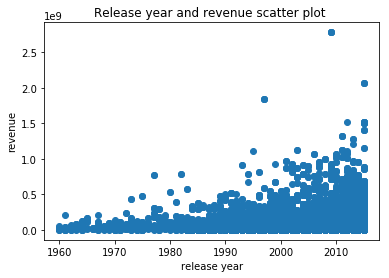

In [33]:
plt.scatter(df_productioncompanies['release_year'],df_productioncompanies['revenue']);

plt.title("Release year and revenue scatter plot ")
plt.xlabel('release year')
plt.ylabel('revenue')

From the above scatter plot of the correlation between release year and revenue, we can see that the revenue obtained by production companies started increasing from the 1990s, yet it was low below he 1990s.

In [23]:
df_productioncompanies.groupby(['release_year','production_companies'])['budget'].sum().to_frame().sort_values('budget', ascending = False)

budget
release_year production_companies                  
2006         Warner Bros.                1181000000
2010         Walt Disney Pictures        1165000000
2004         Warner Bros.                1053000000
2009         Relativity Media            1046146652
             Columbia Pictures           1032600000
...                                             ...
1999         Dinamo Entertainment                 1
2011         Voodoo Production Services           1
             Scion Films                          1
             Chydzik Media Group                  1
             120dB Films                          1

[7080 rows x 1 columns]

I also grouped the dataset by release_year and production_companies, and sorted by the sum of the budget in descending order.From the analysis above, we can also be able to see the production companies that had the highest budget when it came to the production of movies and these were Warner Bros, Walt Disney Pictures, Relativity Media and Colombia pictures among others.

Text(0,0.5,'budget')

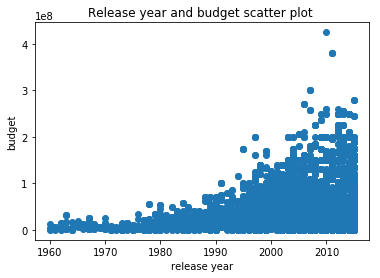

In [34]:
plt.scatter(df_productioncompanies['release_year'],df_productioncompanies['budget']);

plt.title("Release year and budget scatter plot ")
plt.xlabel('release year')
plt.ylabel('budget')

From the above scatter plot of correlation between release year and budget, we can see that the budget of production companies also started increasing from the 1990s with a significant increase from 2000. 

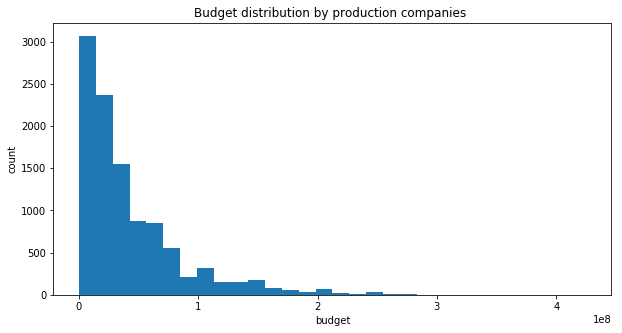

In [25]:
plt.figure(figsize=(10,5))
plt.hist(df_productioncompanies['budget'], bins= 30)
plt.title("Budget distribution by production companies ")
plt.xlabel('budget')
plt.ylabel('count')
plt.show()

From the above graph, we can see that the highest percentage of the budget used in the production of movies is below 100,000,000 dollars.

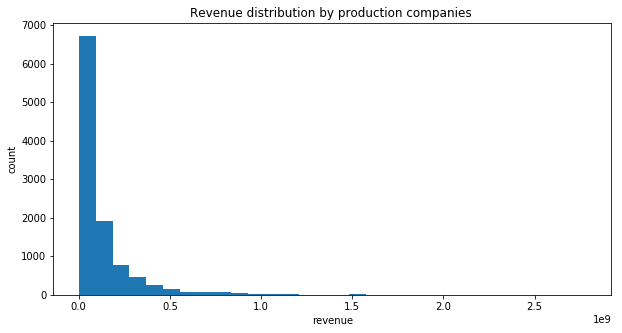

In [35]:
plt.figure(figsize=(10,5))
plt.hist(df_productioncompanies['revenue'], bins= 30)
plt.title("Revenue distribution by production companies ")
plt.xlabel('revenue')
plt.ylabel('count')
plt.show()

From the above graph, we can see that the highest percentage of the revenue distribution obtained from the production of movies is below 50,000,000 dollars.

<a id='conclusions'></a>
## Conclusions
The following are the conclusions from the above analysis;
- The top 5 production companies with the highest revenue are; Universal pictures, Dune Entertainment, Walt Disney Pictures, Twentieth Century Fox Film Corporation, and Columbia Pictures.
- Some of the top production companies with the highest budgets are; Warner Bros, Walt Disney Pictures, and Realtivity Media.
- Warner Bros production company overall had the highest budgets over the years and it is among the top 10 in highest revenue production companies.
- The production company with the highest revenue released its movie in 2015, while that with the highest budget released its movie in 2006.
- The budget distribution range for majority of the production companies was between 0 and 100,000,000 dollars while the revenue distribution range was between 0 and 50,000,000 dollars.
- Over the years, production companies invested more in the production of movies, and the income generated from these movies increased as well from around 1900s.

**Limitation**
- Due to the presence of many null values and zeros in some columns, these rows were dropped which led to results which might not be a true representation of the dataset.

## Submitting your Project 

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0